In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('3campain.csv')
data

,Campain,Sell
0,A,12.6
1,A,12.0
2,A,11.8
3,A,11.9
4,A,13.0
5,A,12.5
6,A,14.0
7,B,10.0
8,B,10.2
9,B,10.0


In [3]:
data['Sell'].mean()

11.980952380952381

In [4]:
data.groupby('Campain').mean()

,Sell
Campain,
A,12.542857
B,11.533333
C,11.825000


In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [6]:
result = ols('Sell ~ Campain', data=data).fit()

In [7]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
Campain,2.0,3.606905,1.803452,0.821297,0.455683
Residual,18.0,39.525476,2.195860,NaN,NaN


In [8]:
data['Mean'] = data['Sell'].mean()

In [9]:
data

,Campain,Sell,Mean
0,A,12.6,11.980952
1,A,12.0,11.980952
2,A,11.8,11.980952
3,A,11.9,11.980952
4,A,13.0,11.980952
5,A,12.5,11.980952
6,A,14.0,11.980952
7,B,10.0,11.980952
8,B,10.2,11.980952
9,B,10.0,11.980952


In [10]:
sum_sq = sum((data['Sell'] - data['Mean']) ** 2)
sum_sq

43.132380952380956

In [11]:
gMean = data.groupby('Campain').mean()[['Sell']]
gMean

,Sell
Campain,
A,12.542857
B,11.533333
C,11.825000


In [12]:
gMean = gMean.rename(columns={'Sell': 'gMean'})
gMean

,gMean
Campain,
A,12.542857
B,11.533333
C,11.825000


In [13]:
data = data.merge(gMean, left_on='Campain', right_index=True)
data

,Campain,Sell,Mean,gMean
0,A,12.6,11.980952,12.542857
1,A,12.0,11.980952,12.542857
2,A,11.8,11.980952,12.542857
3,A,11.9,11.980952,12.542857
4,A,13.0,11.980952,12.542857
5,A,12.5,11.980952,12.542857
6,A,14.0,11.980952,12.542857
7,B,10.0,11.980952,11.533333
8,B,10.2,11.980952,11.533333
9,B,10.0,11.980952,11.533333


In [14]:
ss_r = sum((data['Sell'] - data['gMean']) ** 2)
ss_r

39.52547619047619

In [15]:
ss_e = sum((data['Mean'] - data['gMean']) ** 2)
ss_e

3.6069047619047776

In [16]:
ms_e = ss_e / 2
ms_e

1.8034523809523888

In [17]:
ms_r = ss_r / 18
ms_r

2.1958597883597886

In [18]:
f = ms_e / ms_r
f

0.8212966923081592

In [19]:
import scipy as st

In [20]:
p = 1 - st.stats.f.cdf(f, 2, 18)
p

0.4556832940515221

In [21]:
d = st.stats.f.rvs(2, 18,size=10000)

In [22]:
import matplotlib.pyplot as plt

(array([1.362e+03, 1.156e+03, 9.110e+02, 8.320e+02, 7.530e+02, 6.120e+02,
        5.270e+02, 4.710e+02, 3.890e+02, 3.560e+02, 3.150e+02, 2.450e+02,
        2.570e+02, 1.910e+02, 1.800e+02, 1.640e+02, 1.300e+02, 1.070e+02,
        1.170e+02, 9.600e+01, 7.600e+01, 9.000e+01, 6.600e+01, 5.400e+01,
        5.100e+01, 4.900e+01, 3.700e+01, 3.200e+01, 3.700e+01, 3.000e+01,
        3.300e+01, 2.300e+01, 2.200e+01, 2.500e+01, 1.500e+01, 1.200e+01,
        1.800e+01, 1.100e+01, 1.400e+01, 1.100e+01, 1.200e+01, 1.300e+01,
        8.000e+00, 7.000e+00, 1.000e+01, 5.000e+00, 4.000e+00, 4.000e+00,
        8.000e+00, 4.000e+00, 2.000e+00, 9.000e+00, 4.000e+00, 5.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

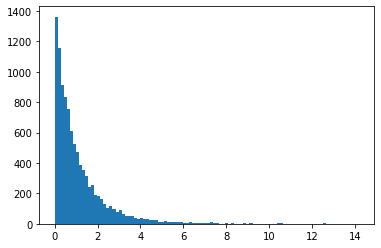

In [26]:
plt.hist(d, bins=100)